In [1]:
#Importing Librarires
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline # for showing the figures in the Notebook itself

# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

UsageError: unrecognized arguments: # for showing the figures in the Notebook itself


In [2]:
df = pd.read_csv("FIFA_data.csv")
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [11]:
## to get only int datatype columns
l = []
for i in df:
    if (df[i].dtype == "int64") or (df[i].dtype == "float64"):
        l.append(i)
l = l[1:]

Figure(1800x1080) AxesSubplot(0.125,0.125;0.775x0.755)


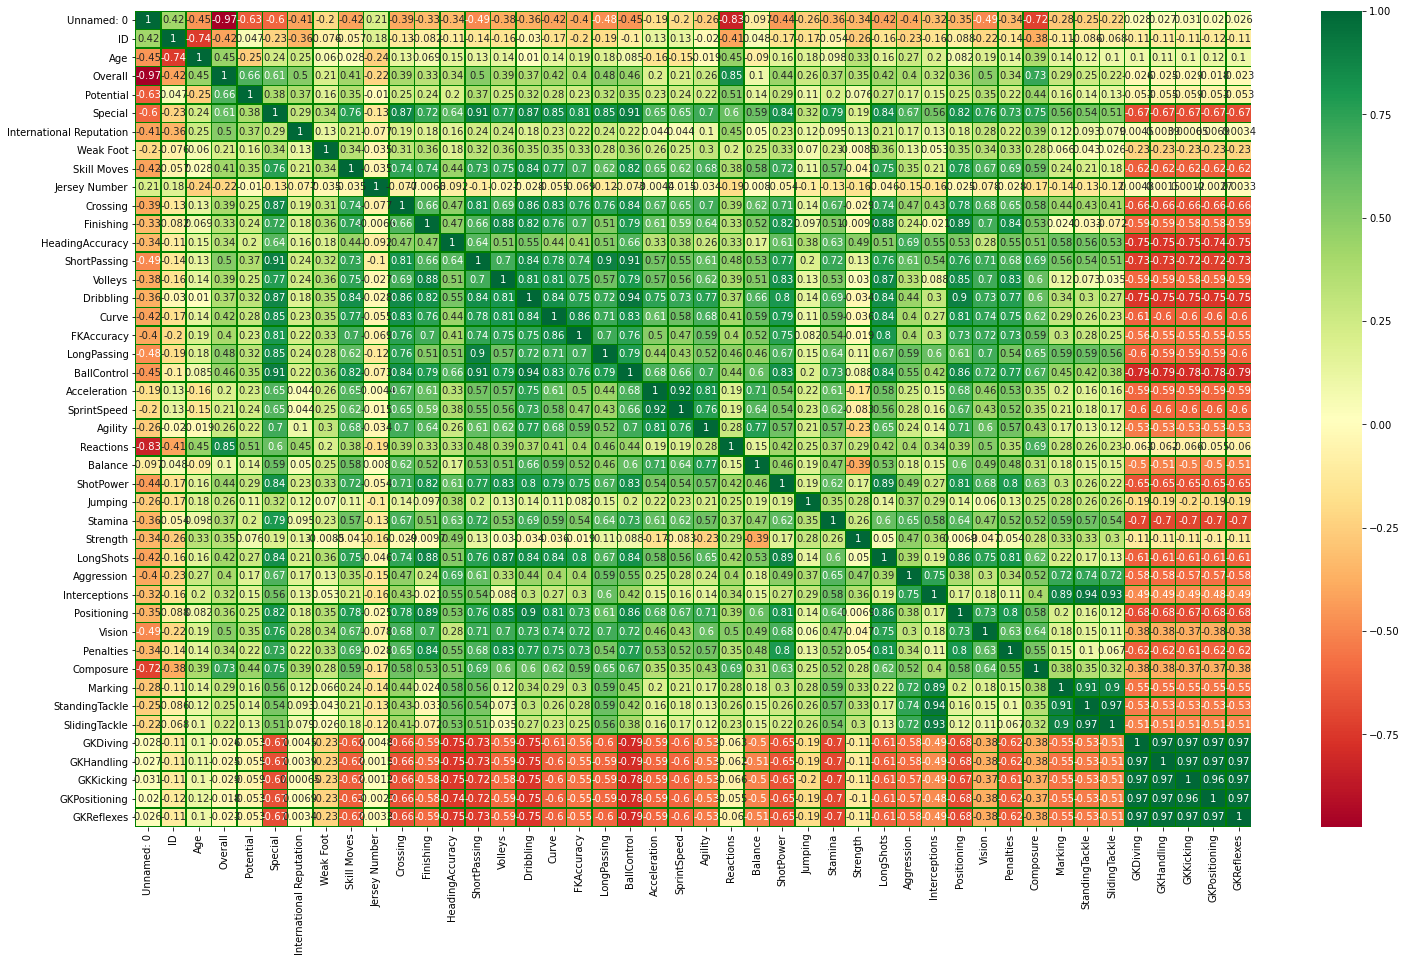

In [36]:
x,y = plt.subplots(figsize=(25,15))
p = sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor = "green",ax=y,cmap="RdYlGn")

In [21]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [40]:
df["Club"].fillna("No club", inplace=True)
df["Position"].fillna("ST", inplace = True)

In [41]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [42]:
t_impute_by_mean = df[['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [57]:
for i in t_impute_by_mean:
    df[i].fillna(df[i].mean(),inplace=True)
    
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1564
Length: 89, dtype: int64

In [72]:
to_impute_by_mode = df[['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in to_impute_by_mode:
    df[i].fillna(df[i].mode()[0],inplace=True)

Index(['Weak Foot', 'Skill Moves', 'Work Rate', 'Real Face', 'Joined',
       'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Release Clause'],
      dtype='object')

In [73]:
to_impute_by_median = df.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in to_impute_by_median.columns:
    df[i].fillna(df[i].median(), inplace = True)

In [74]:
df.columns[df.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [75]:
# functions to get the rounded values from different columns
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [76]:
df.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

In [77]:
## Creating new features from the existing feature collection

df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [81]:
players = df[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

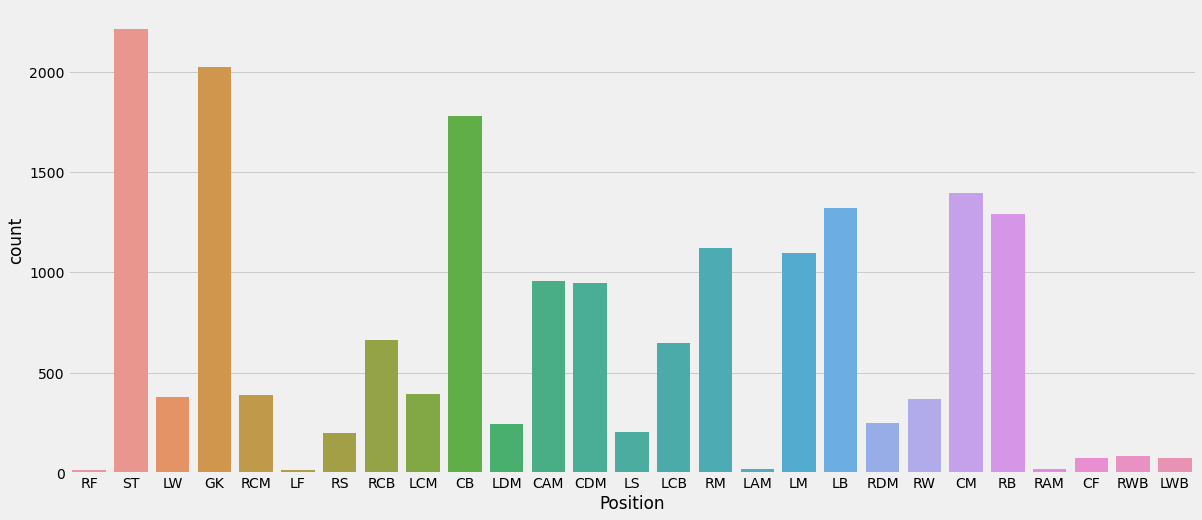

In [133]:
## count plot will help in plotting data for strings

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')

p= sns.countplot("Position",data=df)

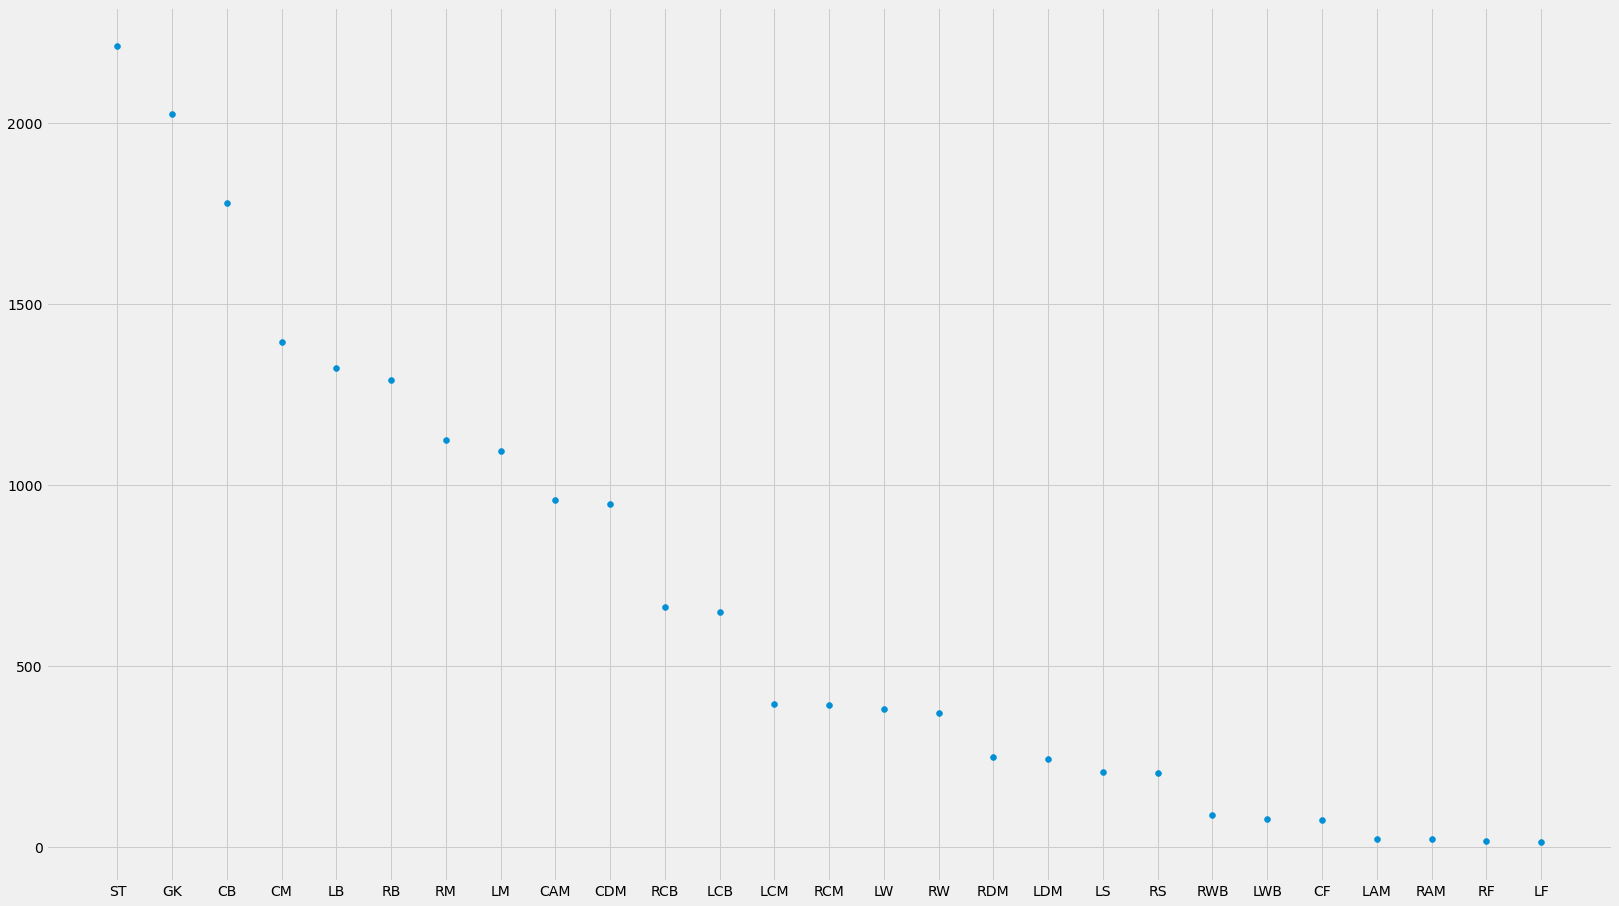

In [118]:
x = df["Position"].value_counts().to_list()
y = df["Position"].value_counts().keys()
plt.figure(figsize=(25,15))
p=plt.scatter(y,x)

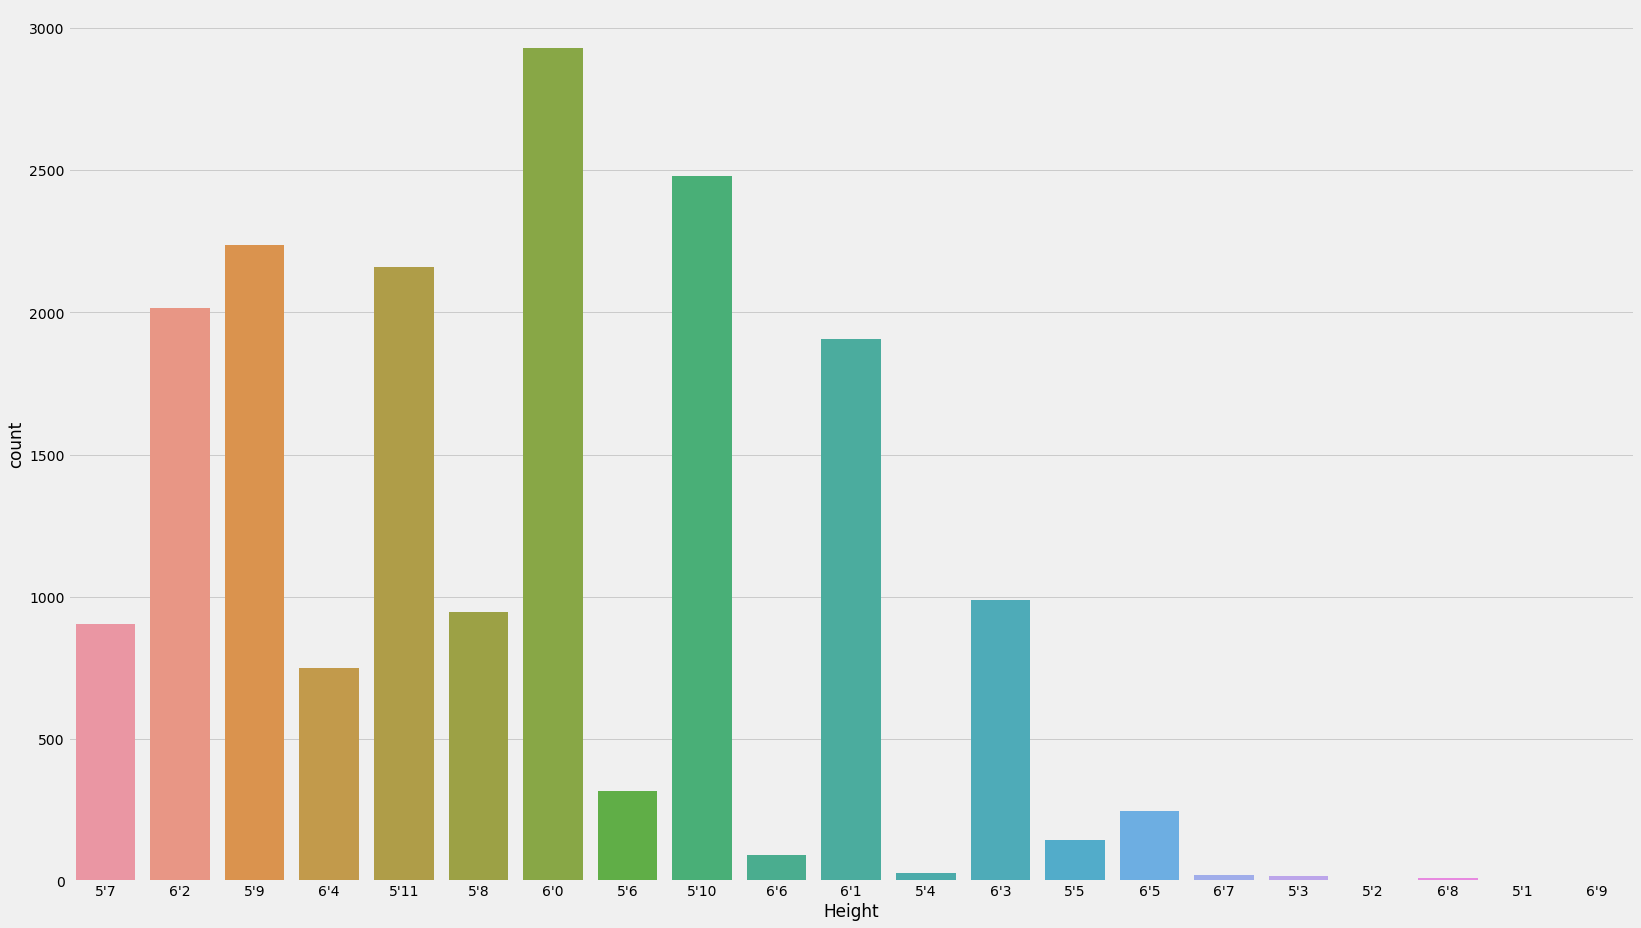

In [130]:
plt.figure(figsize=(25,15))
p = sns.countplot(x="Height",data=df)

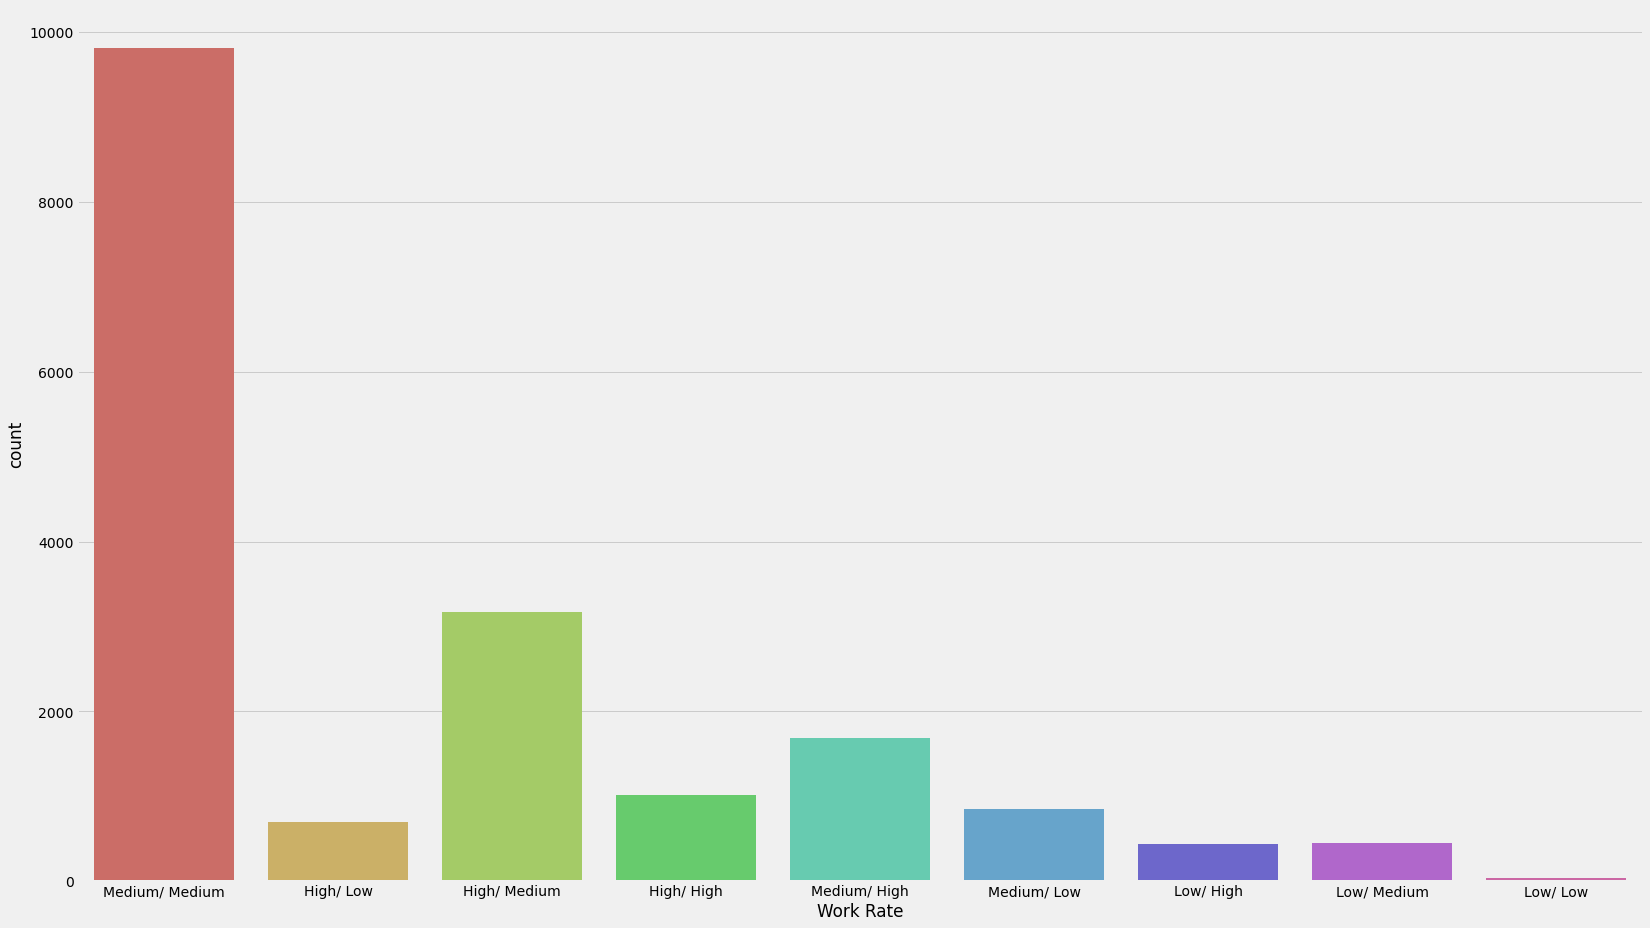

In [131]:
plt.figure(figsize=(25,15))
p = sns.countplot(x = 'Work Rate', data = df, palette = 'hls')

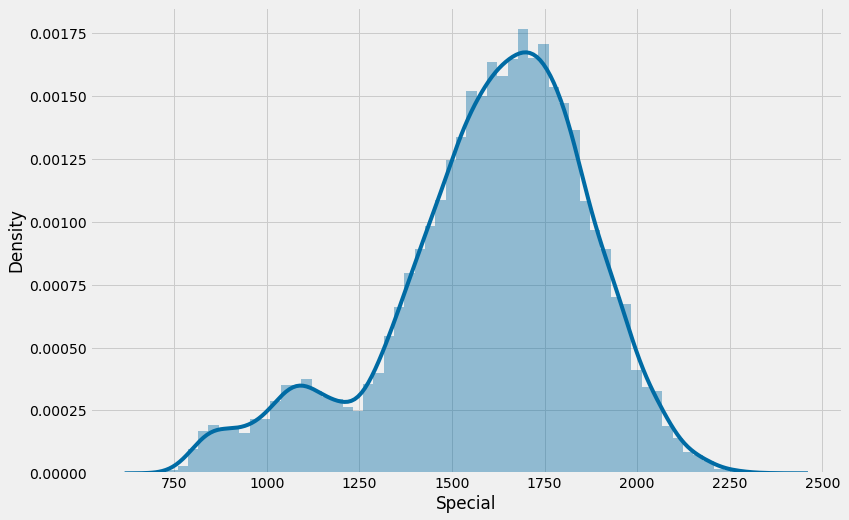

In [147]:
x = df["Special"]
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')
p= sns.distplot(x,kde=True,bins=58)

In [149]:
data = df.copy()

In [151]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data.loc[data['Club'].isin(some_clubs) & data['Overall']]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,8.0,€172.1M,28,83,72,84,92,75,91,82
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,9.0,€137.4M,70,81,80,89,84,77,91,78
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,37.0,€164M,48,85,78,74,84,81,91,87
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,11.0,€104.6M,90,78,77,74,78,82,91,68
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,10.0,€121.3M,89,66,83,78,84,85,90,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15453,15453,241476,Raúl Sánchez,20,https://cdn.sofifa.org/players/4/19/241476.png,Spain,https://cdn.sofifa.org/flags/45.png,59,70,CD Leganés,...,8.0,€621K,33,57,42,58,56,50,64,56
15558,15558,229243,T. Wiesner,21,https://cdn.sofifa.org/players/4/19/229243.png,Germany,https://cdn.sofifa.org/flags/21.png,59,69,Fortuna Düsseldorf,...,60.0,€380K,16,16,23,18,40,45,64,16
16571,16571,246464,J. Theissen,20,https://cdn.sofifa.org/players/4/19/246464.png,Germany,https://cdn.sofifa.org/flags/21.png,57,68,Fortuna Düsseldorf,...,55.0,€280K,9,9,20,21,36,44,62,12
16620,16620,243678,G. Siadas,18,https://cdn.sofifa.org/players/4/19/243678.png,Germany,https://cdn.sofifa.org/flags/21.png,57,73,Fortuna Düsseldorf,...,6.0,€461K,57,46,46,50,58,60,65,31
